In [14]:
# Import Libary
import os
import numpy as np
import pandas as pd


### Constants 
Here, define the fixed values for the analysis. These include the cost to the rider, the initial payment to the driver, and other relevant metrics that remain constant throughout analysis.

In [15]:
# Constants
cost_to_rider = 25  # Prevailing rate for a ride
initial_driver_pay = 19  # Prevailing wage for drivers per trip
initial_lyft_take = cost_to_rider - initial_driver_pay  # Lyft's initial take per ride


### Customer Acquisition Costs (CAC)
This section defines the average acquisition costs for both drivers and riders. These values are essential for calculating the overall costs and net revenue.

In [16]:
# CACs (Customer Acquisition Costs)
average_driver_CAC = (400 + 600) / 2  # Average of $400-$600
average_rider_CAC = (10 + 20) / 2    # Average of $10-$20

### Churn Rates
Here we define the churn rates for both drivers and riders. These rates are crucial for understanding the turnover of drivers and riders and how it impacts the service.

In [17]:
# Churn Rates
driver_churn_rate = 0.05  # 5% monthly churn rate for drivers
rider_churn_no_failed_ride = 0.10  # 10% monthly churn for riders without failed rides
rider_churn_failed_ride = 0.33  # 33% monthly churn for riders with failed rides


### Match Rates for Different Lyft Takes
In this section, calculates the match rates for different amounts that Lyft takes from the fare. This is based on the assumption of a linear relationship between Lyft's take and the match rate.


In [18]:
# Match rates for different Lyft takes (based on given experiment and assumptions)
# lyft_takes = np.arange(1, 7)  # $1 to $6 old code to see if worked
# Adjusting Lyft takes to range from $1.01 to $6.00 in increments of $0.01
lyft_takes = np.arange(1.01, 6.01, 0.01)
match_rate_increase_per_dollar_decrease = (0.93 - 0.60) / (initial_lyft_take - 3)  # From the experiment
match_rates = np.minimum(0.60 + match_rate_increase_per_dollar_decrease * (initial_lyft_take - lyft_takes), 1.0)  # Capping at 100%


### Net Revenue Calculation
Finally, this section computes the net revenue for each scenario (different Lyft takes). It considers the impact of match rates on rider churn and the subsequent effect on revenue and costs.

In [19]:
# Implementing the Net Revenue Calculation with adjusted match rates
net_revenue_results = []

for lyft_take, match_rate in zip(lyft_takes, match_rates):
    # Calculating the monthly churn rates for riders
    monthly_rider_churn_rate = rider_churn_failed_ride * (1 - match_rate) + rider_churn_no_failed_ride * match_rate

    # Estimating the impact on revenue
    completed_rides = match_rate  # Proportional to match rate
    monthly_revenue = completed_rides * (cost_to_rider - lyft_take)

    # Estimating the impact on CAC
    monthly_rider_CAC_cost = monthly_rider_churn_rate * average_rider_CAC
    monthly_driver_CAC_cost = driver_churn_rate * average_driver_CAC

    # Calculating net revenue (assuming 1 ride request per rider per month)
    annual_net_revenue = (monthly_revenue - monthly_rider_CAC_cost - monthly_driver_CAC_cost) * 12
    net_revenue_results.append((lyft_take, match_rate, annual_net_revenue))


Create a Dataframe for export and visualization

In [20]:
# Convert results to a DataFrame for better visualization
df_net_revenue = pd.DataFrame(net_revenue_results, columns=['Lyft Take', 'Match Rate', 'Annual Net Revenue'])
df_net_revenue.set_index('Lyft Take', inplace=True)
df_net_revenue

,Match Rate,Annual Net Revenue
Lyft Take,,
1.01,1.0000,-30.120000
1.02,1.0000,-30.240000
1.03,1.0000,-30.360000
1.04,1.0000,-30.480000
1.05,1.0000,-30.600000
...,...,...
5.96,0.6044,-196.284528
5.97,0.6033,-196.653792
5.98,0.6022,-197.022792


Generate a couple graphs for visualization

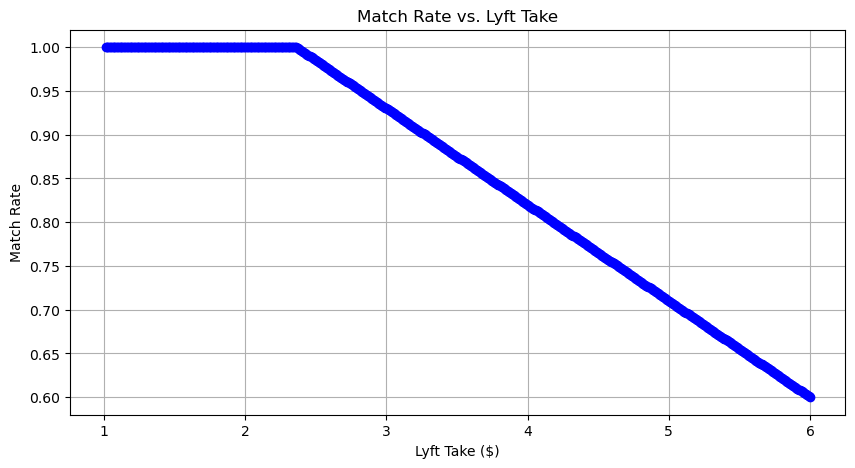

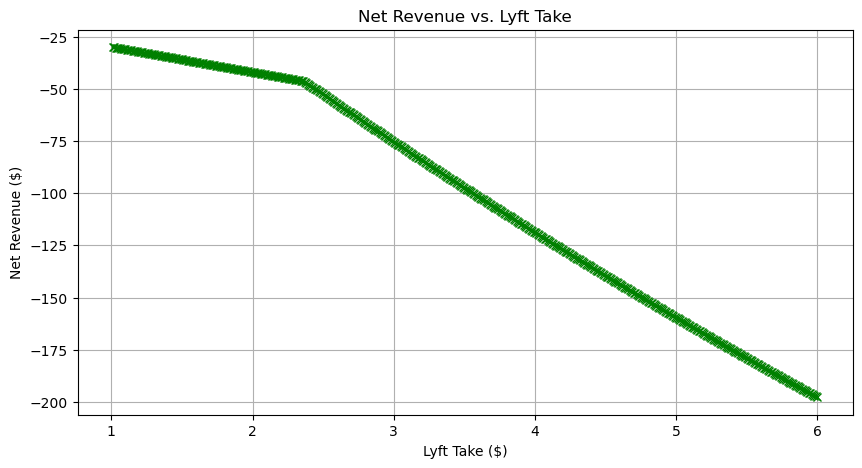

In [3]:
# Re-importing necessary libraries and redefining variables since the code execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Redefining constants and variables as per the analysis conducted
cost_to_rider = 25
initial_driver_pay = 19
initial_lyft_take = cost_to_rider - initial_driver_pay
driver_churn_rate = 0.05
rider_churn_no_failed_ride = 0.10
rider_churn_failed_ride = 0.33
average_driver_CAC = (400 + 600) / 2
average_rider_CAC = (10 + 20) / 2
lyft_takes = np.arange(1.01, 6.01, 0.01)
match_rate_increase_per_dollar_decrease = (0.93 - 0.60) / (initial_lyft_take - 3)
match_rates = np.minimum(0.60 + match_rate_increase_per_dollar_decrease * (initial_lyft_take - lyft_takes), 1.0)

# Recalculating net revenue with the adjusted match rates
net_revenue_results = []

for lyft_take, match_rate in zip(lyft_takes, match_rates):
    monthly_rider_churn_rate = rider_churn_failed_ride * (1 - match_rate) + rider_churn_no_failed_ride * match_rate
    monthly_revenue = match_rate * (cost_to_rider - lyft_take)
    monthly_rider_CAC_cost = monthly_rider_churn_rate * average_rider_CAC
    monthly_driver_CAC_cost = driver_churn_rate * average_driver_CAC
    annual_net_revenue = (monthly_revenue - monthly_rider_CAC_cost - monthly_driver_CAC_cost) * 12
    net_revenue_results.append((lyft_take, match_rate, annual_net_revenue))

# Extracting data for plots
lyft_takes = [item[0] for item in net_revenue_results]
actual_match_rates = [item[1] for item in net_revenue_results]
actual_net_revenues = [item[2] for item in net_revenue_results]

# Plot for Match Rate
plt.figure(figsize=(10, 5))
plt.plot(lyft_takes, actual_match_rates, label='Match Rate', color='blue', marker='o')
plt.ylabel('Match Rate')
plt.xlabel('Lyft Take ($)')
plt.title('Match Rate vs. Lyft Take')
plt.grid(True)
plt.show()

# Plot for Net Revenue
plt.figure(figsize=(10, 5))
plt.plot(lyft_takes, actual_net_revenues, label='Net Revenue', color='green', marker='x')
plt.ylabel('Net Revenue ($)')
plt.xlabel('Lyft Take ($)')
plt.title('Net Revenue vs. Lyft Take')
plt.grid(True)
plt.show()

